Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Analysis and Collection

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 -> Represents having heart disease


0 -> Represents not having a heart disease

In [9]:
correlate=df.corr()

<Axes: >

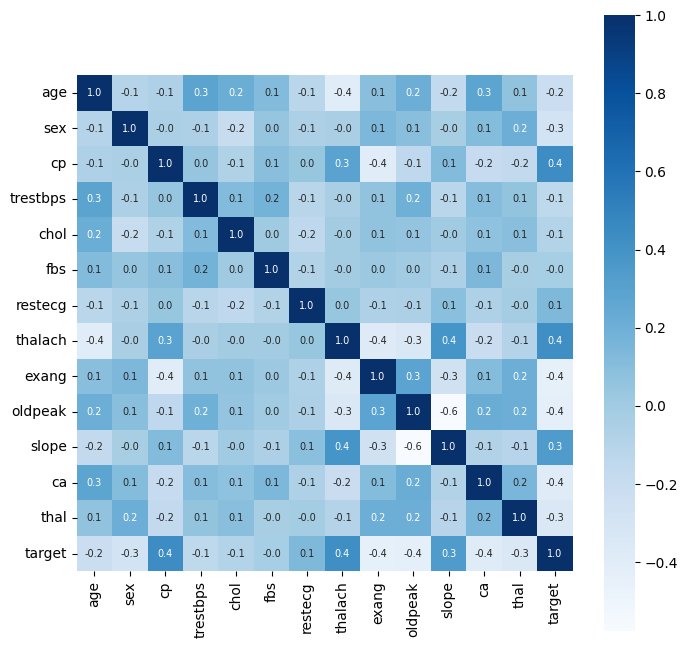

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlate,annot=True,fmt=".1f",square=True,annot_kws=({'size':7}),cmap="Blues")

In [11]:
x=df.drop(columns='target',axis=1)
y=df['target']

Hyper-Parameter Tuning

In [16]:
model=LogisticRegression(max_iter=5000)
parameters={'C':[1,5,10]}
from sklearn.model_selection import GridSearchCV
m=GridSearchCV(model,parameters,cv=5)
m.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [1, 5, 10]})

In [17]:
m.best_params_

{'C': 5}

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [21]:
model=LogisticRegression(C=5,max_iter=5000)

In [22]:
model.fit(x_train,y_train)

LogisticRegression(C=5, max_iter=5000)

In [23]:
y_train_predicted=model.predict(x_train)
y_test_predicted=model.predict(x_test)

In [24]:
train_accuracy=accuracy_score(y_train_predicted,y_train)
test_accuracy=accuracy_score(y_test_predicted,y_test)

In [25]:
print(f"Training accuracy is {train_accuracy}")

Training accuracy is 0.8553719008264463


In [26]:
print(f"Testing accuracy is {test_accuracy}")

Testing accuracy is 0.8360655737704918


Bulding a predictive system

In [27]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

# user input data
input_data=[49,1,1,130,266,0,1,171,0,0.6,2,0,2]

# converting the input list to numpy array
input_data=np.asarray(input_data)

#reshaping the array as the model takes only 2D input
input_data_reshaped=input_data.reshape(1,-1)

#predicting the model
predict=model.predict(input_data_reshaped)

if predict[0]==0:
  print("The person is not have Heart Disease")
else:
  print("The Person has Heart Disease")

The Person has Heart Disease


In [28]:
import pickle

In [29]:
file_name="heart_disease_model.sav"
pickle.dump(model,open(file_name,"wb"))

In [30]:
loaded=pickle.load(open(file_name,"rb"))

In [31]:
loaded

LogisticRegression(C=5, max_iter=5000)

In [32]:
for column in x.columns:
  print(f"{column}")

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
